In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import skfuzzy as fuzz

In [14]:
df = pd.read_csv("wifi_localization.txt",sep="\t", header=None)
df = abs(df)
data = df[[0,1,2,3,4,5,6]]
df

,0,1,2,3,4,5,6,7
0,64,56,61,66,71,82,81,1
1,68,57,61,65,71,85,85,1
2,63,60,60,67,76,85,84,1
3,61,60,68,62,77,90,80,1
4,63,65,60,63,77,81,87,1
...,...,...,...,...,...,...,...,...
1995,59,59,48,66,50,86,94,4
1996,59,56,50,62,47,87,90,4
1997,62,59,46,65,45,87,88,4
1998,62,58,52,61,41,90,85,4


In [15]:
df.describe()

,0,1,2,3,4,5,6,7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,52.330500,55.623500,54.964000,53.566500,62.640500,80.985000,81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,10.000000,45.000000,40.000000,11.000000,36.000000,61.000000,63.000000,1.000000
25%,46.000000,53.000000,51.000000,46.000000,56.000000,77.000000,78.000000,1.750000
50%,55.000000,56.000000,55.000000,56.000000,64.000000,82.000000,83.000000,2.500000
75%,61.000000,58.000000,58.000000,63.000000,69.000000,86.000000,87.000000,3.250000
max,74.000000,74.000000,73.000000,77.000000,89.000000,97.000000,98.000000,4.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff329203880>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff3291f0e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff329203fa0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff329211250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff329211520>,
 'means': []}

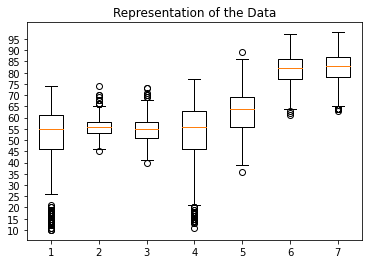

In [16]:
plt.yticks(range(0,100,5))
plt.title("Representation of the Data")
plt.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff329338d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff3292fcfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff329405a30>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff32929a280>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff329371eb0>,
 'means': []}

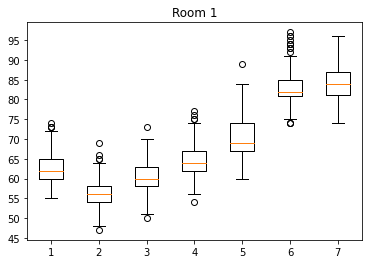

In [17]:
filt_room1 = (df[7]==1)
plt.yticks(range(0,100,5))
plt.title("Room 1")
plt.boxplot(data[filt_room1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff3290f1c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff3290fe1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff3290f1940>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff3290fe790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff3290fea60>,
 'means': []}

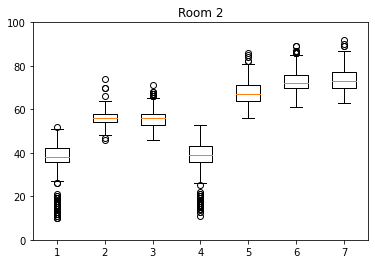

In [18]:
filt_room2 = (df[7]==2)
plt.ylim(0,100)
plt.title("Room 2")
plt.boxplot(data[filt_room2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff329050b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff328fe1160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff32913fdc0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff328fe1700>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff328fe19d0>,
 'means': []}

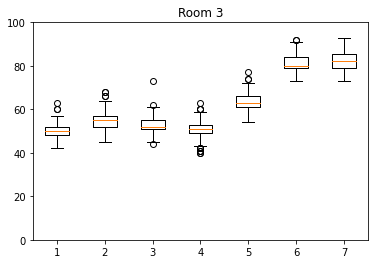

In [19]:
filt_room3 = (df[7]==3)
plt.ylim(0,100)
plt.title("Room 3")
plt.boxplot(data[filt_room3])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff328f379a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff328f37f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff328f376d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff328f43520>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff328f437f0>,
 'means': []}

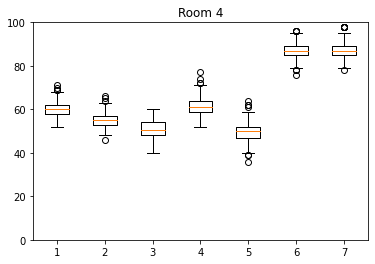

In [20]:
filt_room4 = (df[7]==4)
plt.ylim(0,100)
plt.title("Room 4")
plt.boxplot(data[filt_room4])

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


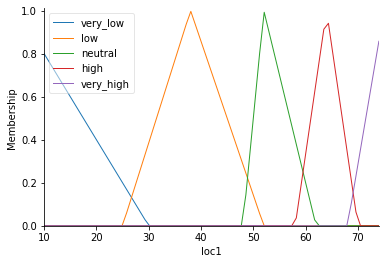

In [21]:
# Location 1

X = np.linspace(start=data[0].min(), stop=data[0].max(), num=data[0].max(), endpoint=True, retstep=False)
loc1 = ctrl.Antecedent(X, 'loc1')

interval1 = [5, 5, 30]
interval2 = [25, int(((52-25)/2) + 25), 52]
interval3 = [48, int(((62-48)/2) + 45), 62]
interval4 = [58, int(((70-58)/2) + 58), 70]
interval5 = [68, 75, 75]

loc1['very_low'] = fuzz.membership.trimf(X, interval1)
loc1['low'] = fuzz.membership.trimf(X, interval2)
loc1['neutral'] = fuzz.membership.trimf(X, interval3)
loc1['high'] = fuzz.membership.trimf(X, interval4)
loc1['very_high'] = fuzz.membership.trimf(X, interval5)
loc1.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


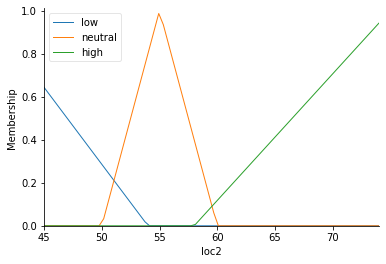

In [22]:
# Location 2

X = np.linspace(start=data[1].min(), stop=data[1].max(), num=data[1].max(), endpoint=True, retstep=False)
loc2 = ctrl.Antecedent(X, 'loc2')

interval1 = [40, 40, 54]
interval2 = [50, int(((60-50)/2) + 50), 60]
interval3 = [58, 75, 75]

loc2['low'] = fuzz.membership.trimf(X, interval1)
loc2['neutral'] = fuzz.membership.trimf(X, interval2)
loc2['high'] = fuzz.membership.trimf(X, interval3)
loc2.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


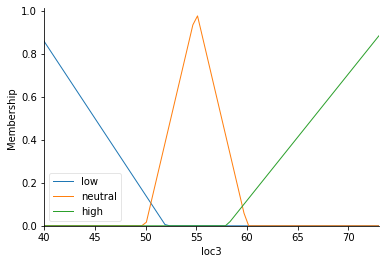

In [25]:
# Location 3
X = np.linspace(start=data[2].min(), stop=data[2].max(), num=data[2].max(), endpoint=True, retstep=False)
loc3 = ctrl.Antecedent(X, 'loc3')

interval1 = [38, 38, 52]
interval2 = [50, int(((60-50)/2) + 50), 60]
interval3 = [58, 75, 75]

loc3['low'] = fuzz.membership.trimf(X, interval1)
loc3['neutral'] = fuzz.membership.trimf(X, interval2)
loc3['high'] = fuzz.membership.trimf(X, interval3)
loc3.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


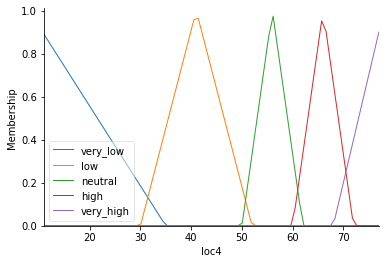

In [26]:
# Location 4

X = np.linspace(start=data[3].min(), stop=data[3].max(), num=data[3].max(), endpoint=True, retstep=False)
loc4 = ctrl.Antecedent(X, 'loc4')

interval1 = [8, 8, 35]
interval2 = [30, int(((52-30)/2) + 30), 52]
interval3 = [50, int(((62-50)/2) + 50), 62]
interval4 = [60, int(((72-60)/2) + 60), 72]
interval5 = [68, 78, 78]

loc4['very_low'] = fuzz.membership.trimf(X, interval1)
loc4['low'] = fuzz.membership.trimf(X, interval2)
loc4['neutral'] = fuzz.membership.trimf(X, interval3)
loc4['high'] = fuzz.membership.trimf(X, interval4)
loc4['very_high'] = fuzz.membership.trimf(X, interval5)
loc4.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


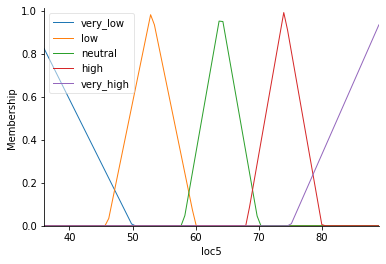

In [28]:
# Location 5

X = np.linspace(start=data[4].min(), stop=data[4].max(), num=data[4].max(), endpoint=True, retstep=False)
loc5 = ctrl.Antecedent(X, 'loc5')

interval1 = [33, 33, 50]
interval2 = [46, int(((60-46)/2) + 46), 60]
interval3 = [58, int(((70-58)/2) + 58), 70]
interval4 = [68, int(((80-68)/2) + 68), 80]
interval5 = [75, 90, 90]

loc5['very_low'] = fuzz.membership.trimf(X, interval1)
loc5['low'] = fuzz.membership.trimf(X, interval2)
loc5['neutral'] = fuzz.membership.trimf(X, interval3)
loc5['high'] = fuzz.membership.trimf(X, interval4)
loc5['very_high'] = fuzz.membership.trimf(X, interval5)
loc5.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


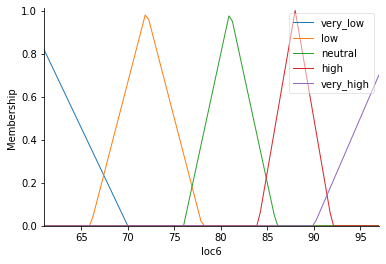

In [29]:
# Location 6

X = np.linspace(start=data[5].min(), stop=data[5].max(), num=data[5].max(), endpoint=True, retstep=False)
loc6 = ctrl.Antecedent(X, 'loc6')

interval1 = [59, 59, 70]
interval2 = [66, int(((78-66)/2) + 66), 78]
interval3 = [76, int(((86-76)/2) + 76), 86]
interval4 = [84, int(((92-84)/2) + 84), 92]
interval5 = [90, 100, 100]

loc6['very_low'] = fuzz.membership.trimf(X, interval1)
loc6['low'] = fuzz.membership.trimf(X, interval2)
loc6['neutral'] = fuzz.membership.trimf(X, interval3)
loc6['high'] = fuzz.membership.trimf(X, interval4)
loc6['very_high'] = fuzz.membership.trimf(X, interval5)
loc6.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


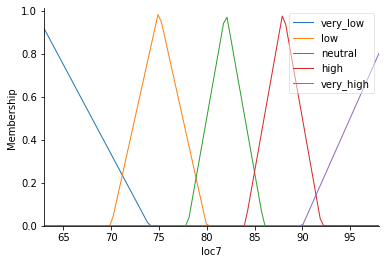

In [30]:
# Location 7

X = np.linspace(start=data[6].min(), stop=data[6].max(), num=data[6].max(), endpoint=True, retstep=False)
loc7 = ctrl.Antecedent(X, 'loc7')

interval1 = [62, 62, 74]
interval2 = [70, int(((80-70)/2) + 70), 80]
interval3 = [78, int(((86-78)/2) + 78), 86]
interval4 = [84, int(((92-84)/2) + 84), 92]
interval5 = [90, 100, 100]

loc7['very_low'] = fuzz.membership.trimf(X, interval1)
loc7['low'] = fuzz.membership.trimf(X, interval2)
loc7['neutral'] = fuzz.membership.trimf(X, interval3)
loc7['high'] = fuzz.membership.trimf(X, interval4)
loc7['very_high'] = fuzz.membership.trimf(X, interval5)
loc7.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


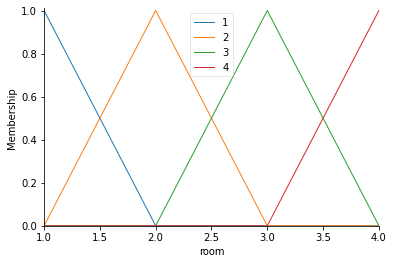

In [38]:
room = ctrl.Consequent(np.arange(1, 5, 1), 'room')
room.automf(4, names=['1','2','3','4'])
room.view()

In [39]:
#RULES#
rule1 = ctrl.Rule(loc1['neutral'], room['1'])
#rule2 = ctrl.Rule(weight['low'] & age['high'], health['low'])
#rule3 = ctrl.Rule(weight['high'], health['low'])
problem_ctrl  = ctrl.ControlSystem([rule1])
problem = ctrl.ControlSystemSimulation(problem_ctrl)